In [9]:
#required packages
!pip install mne tigramite numpy scipy matplotlib gudhi

Defaulting to user installation because normal site-packages is not writeable


In [11]:
!pip install "numpy<2"

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_path='../data/eeg1.edf'
annot_path='../data/annotations_2017_A.csv'

raw = mne.io.read_raw_edf(data_path, preload=True)
print(raw.info)


Extracting EDF parameters from C:\Users\dhruv\data\eeg1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1790207  =      0.000 ...  6992.996 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-REF, EEG Fp2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2011-11-11 11:11:11 UTC
 nchan: 21
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | his_id: >
>


### Summary of the Loaded EEG Data (`eeg1.edf`)

This output provides a metadata summary of the raw EEG recording file. It tells us about the structure and parameters of the data before any analysis.

* **Channels**: The recording contains **21 EEG channels** (`nchan: 21`). The names (`ch_names`) like `Fp1-REF` follow the standard 10-20 system for electrode placement on the scalp.

* **Duration**: The total recording length is **6993 seconds** (approximately 116.5 minutes).

* **Sampling Frequency (`sfreq`)**: The data was sampled at **256 Hz**. This is a critical parameter, meaning the signal from each channel was measured 256 times every second.

* **Filters**:
    * `highpass: 0.0 Hz`: No high-pass filter was applied during recording, so very slow signal drifts are still present in the data.
    * `lowpass: 128.0 Hz`: A low-pass filter was applied, meaning frequencies above 128 Hz have been removed. This is consistent with the Nyquist frequency (half the sampling rate).

* **Status**:
    * `custom_ref_applied: False`: The data has not yet been re-referenced, a standard preprocessing step to improve signal quality.

In [3]:
data, times = raw.get_data(return_times=True)
print(f"Data shape: {data.shape}, Duration: {times[-1]/60:.2f} min")


annots = pd.read_csv(annot_path)
print(annots.head()) 
print(f"Annot shape: {annots.shape}")


Data shape: (21, 1790208), Duration: 116.55 min
     1    2    3    4    5    6    7    8    9   10  ...   70   71   72   73  \
0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    74   75   76   77   78   79  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 79 columns]
Annot shape: (15416, 79)


### Understanding the Annotation Data Structure

The annotation file is a large grid (matrix) where:

* **Each ROW** represents a specific time epoch (a ~0.45 second window of the EEG recording).
* **Each COLUMN** represents a specific patient (e.g., the column `'1'` corresponds to the file `eeg1.edf`).
* **The VALUE** in each cell (`0.0` or `1.0`) is the expert's label for that specific patient during that specific time epoch.
    * `1.0` signifies that a **seizure was present**.
    * `0.0` signifies that **no seizure was present**.

Using matplotlib as 2D backend.


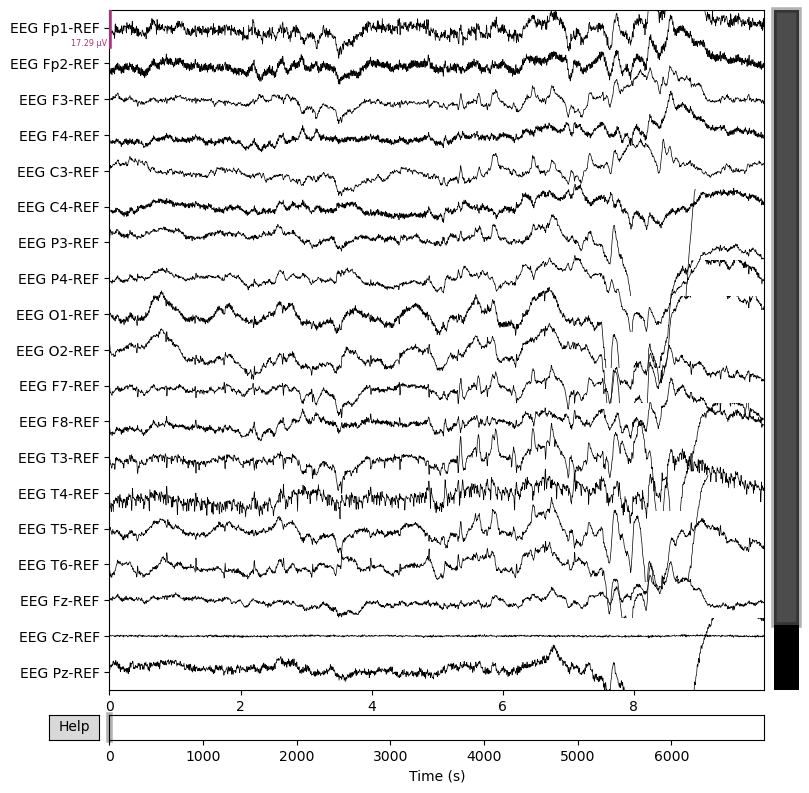

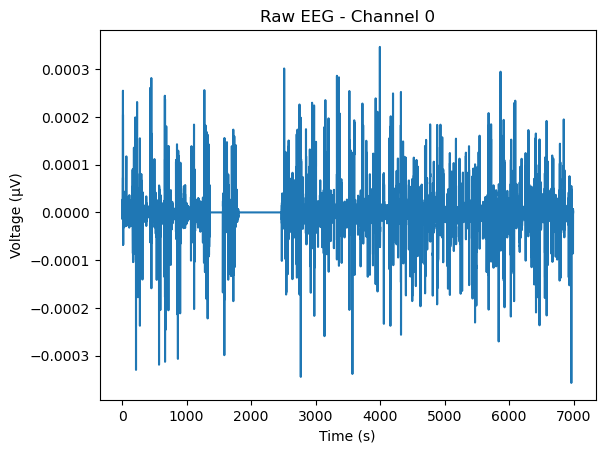

In [4]:
# Plot first 10 seconds, all channels
raw.plot(start=0, duration=10, n_channels=19, scalings='auto')
plt.show()

# Plot a specific channel over full time
plt.plot(times, data[0, :])  # Channel 0 (e.g., Fp1-F3)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.title('Raw EEG - Channel 0')
plt.show()